<a href="https://colab.research.google.com/github/Betsy03/Telecom-Churn-/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [10]:
telecom_df=pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom_df.shape

(7043, 21)

In [ ]:
missing_values_count = telecom_df.isnull().sum()

# Step 2: Calculate the total number of rows
total_rows = len(telecom_df)

# Step 3: Compute the percentage of missing values for each column
missing_percentage = (missing_values_count / total_rows) * 100

# Display the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [16]:
#Removing missing values
telecom_df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
telecom_df.TotalCharges=pd.to_numeric(telecom_df.TotalCharges,errors='coerce')
telecom_df.SeniorCitizen = telecom_df.SeniorCitizen.astype(str)


In [ ]:
telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Get the numerical and categorical columns
numerical_columns = telecom_df.select_dtypes(include=['int64','float64']).columns
categorical_columns = telecom_df.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns_sel=telecom_df[['SeniorCitizen','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                         'DeviceProtection','StreamingTV','StreamingMovies','Contract']]


In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(telecom_df.describe())

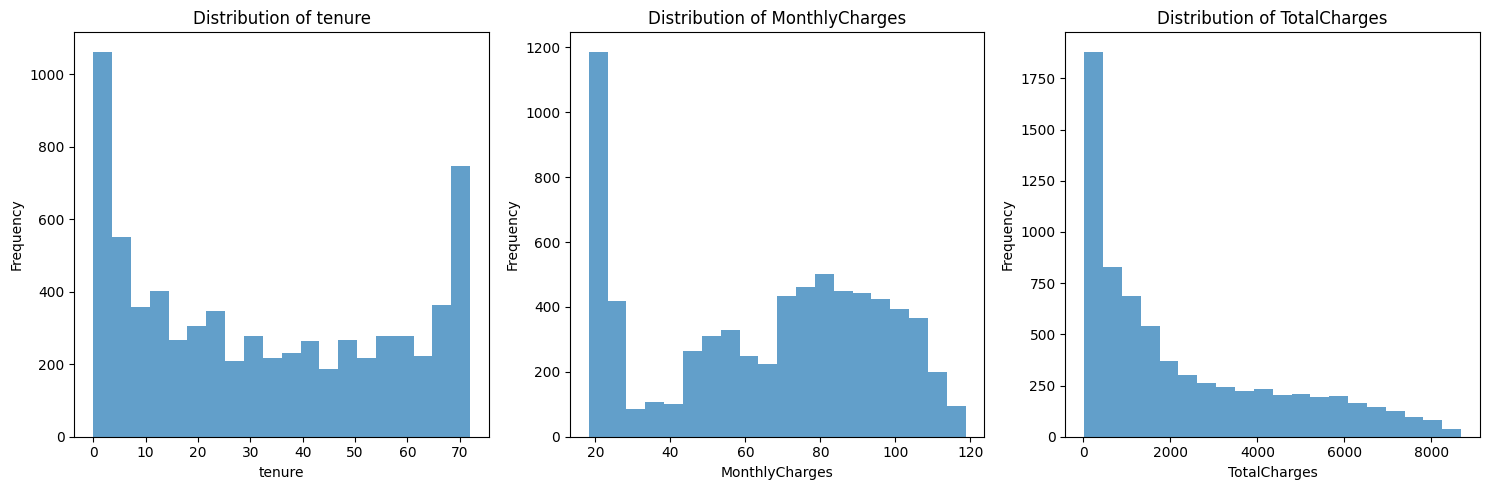

In [ ]:
# Create subplots for numerical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Distribution of a numerical variable (Tenure,Monthly Charges ,Total Charges)
# Plot each numerical variable in a subplot
for i, column in enumerate(telecom_df[numerical_columns]):
    axes[i].hist(telecom_df[column], bins=20, alpha=0.7)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

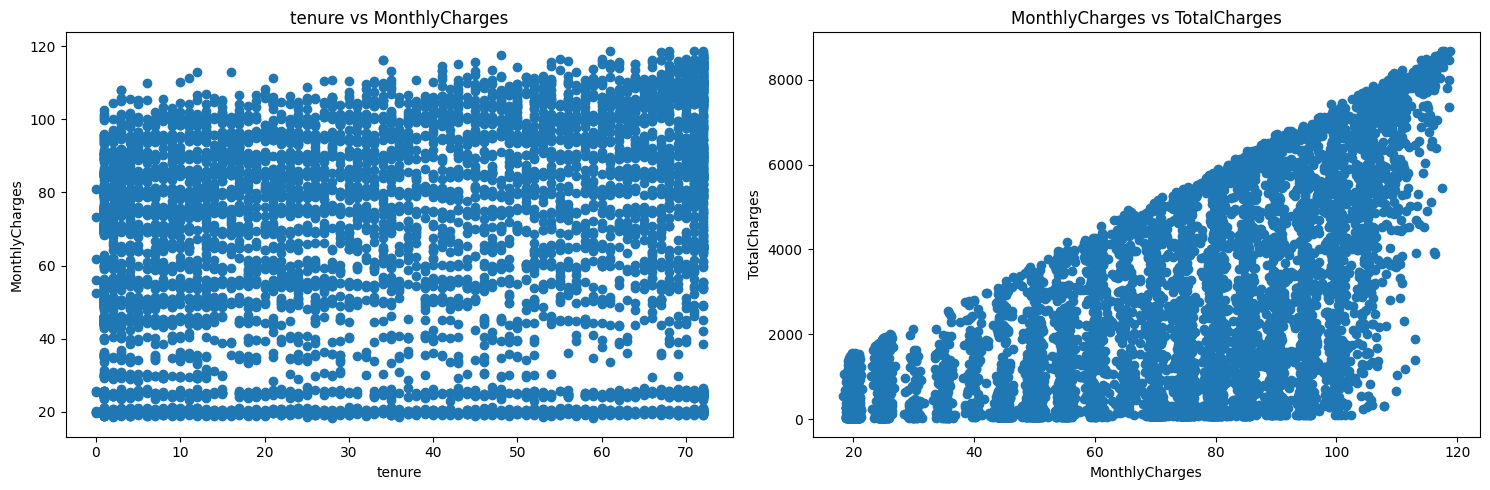

In [ ]:
# Relationship between two numerical variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Plot the relationship between pairs of numerical variables
for i in range(len(numerical_columns) - 1):
    x_column = numerical_columns[i]
    y_column = numerical_columns[i + 1]

    axes[i].scatter(telecom_df[x_column], telecom_df[y_column])
    axes[i].set_title(f'{x_column} vs {y_column}')
    axes[i].set_xlabel(x_column)
    axes[i].set_ylabel(y_column)

plt.tight_layout()
plt.show()

In [ ]:
telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

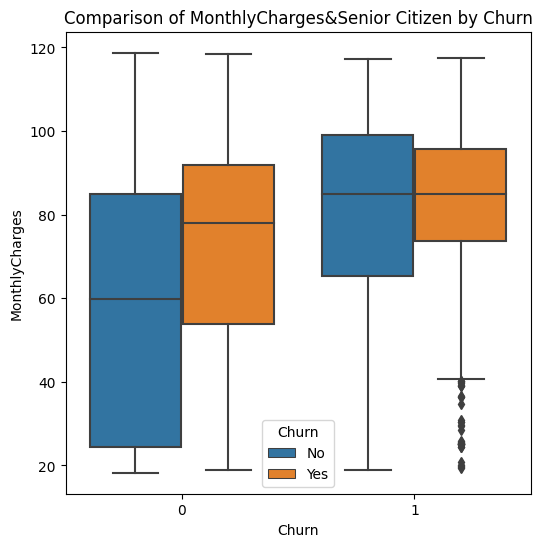

In [ ]:
# Relationship between  numerical and Categorical variables
# Create a box plot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges',hue='Churn' ,data=telecom_df)
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Comparison of MonthlyCharges&Senior Citizen by Churn')
plt.show()

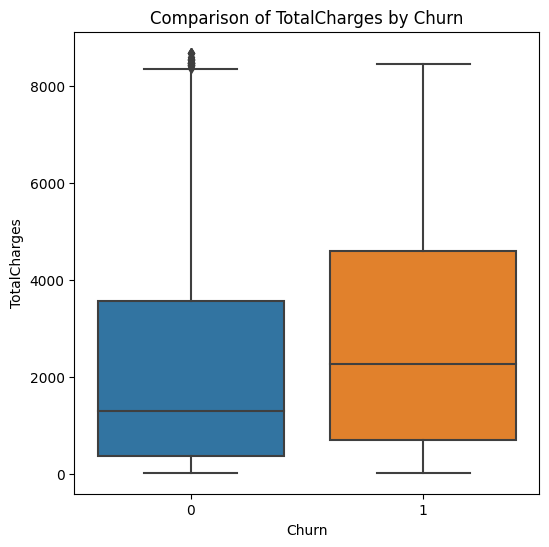

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='SeniorCitizen', y='TotalCharges' ,data=telecom_df)
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.title('Comparison of TotalCharges by Churn')
plt.show()

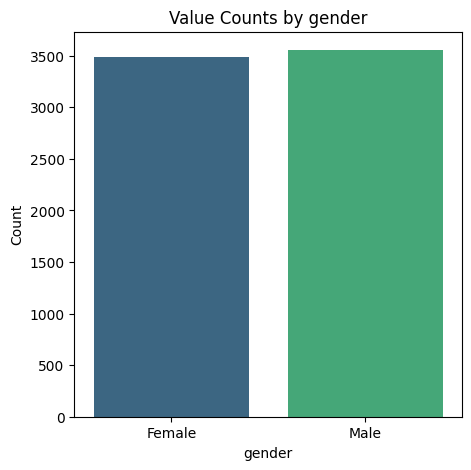

In [ ]:
#Data Exploration
Gender_Per=round(telecom_df.gender.value_counts()/len(telecom_df)*100,2)

plt.figure(figsize=(5, 5))
ax=sns.countplot(x='gender', data=telecom_df, palette='viridis')  # Change palette as needed
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Value Counts by gender')
plt.show()


In [ ]:
Gender_Per

Male      50.48
Female    49.52
Name: gender, dtype: float64

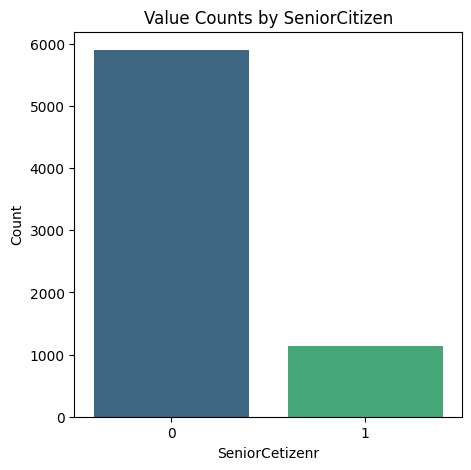

In [ ]:
SeniorCetizen_Per=round(telecom_df.SeniorCitizen.value_counts()/len(telecom_df)*100,2)

plt.figure(figsize=(5, 5))
ax=sns.countplot(x='SeniorCitizen', data=telecom_df, palette='viridis')
plt.xlabel('SeniorCetizenr')
plt.ylabel('Count')
plt.title('Value Counts by SeniorCitizen')
plt.show()

In [ ]:
SeniorCetizen_Per

0    83.79
1    16.21
Name: SeniorCitizen, dtype: float64

## Customer Account Information

Text(0.5, 1.0, '# of Customers by their tenure')

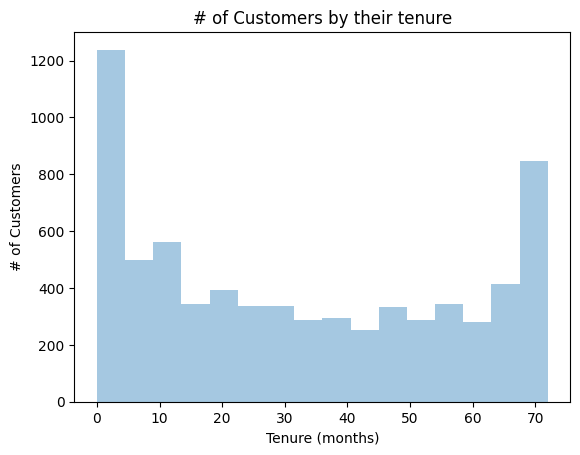

In [ ]:
ax = sns.distplot(telecom_df['tenure'], hist=True,kde=False)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

*Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months*.Lets see this with contract





**Contracts**:Lets look at the nos of customers by different contracts

Text(0.5, 1.0, '# of Customers by Contract Type')

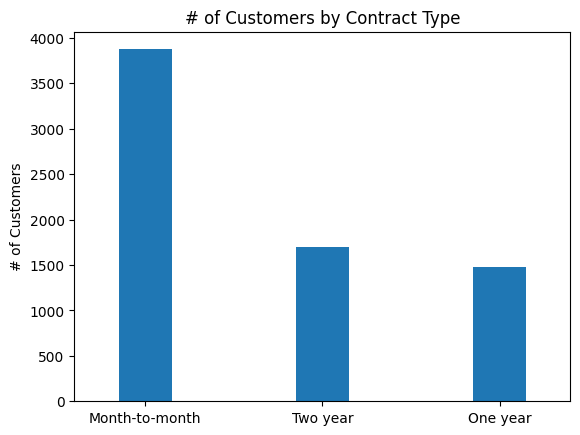

In [ ]:
ax=telecom_df['Contract'].value_counts().plot(kind='bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

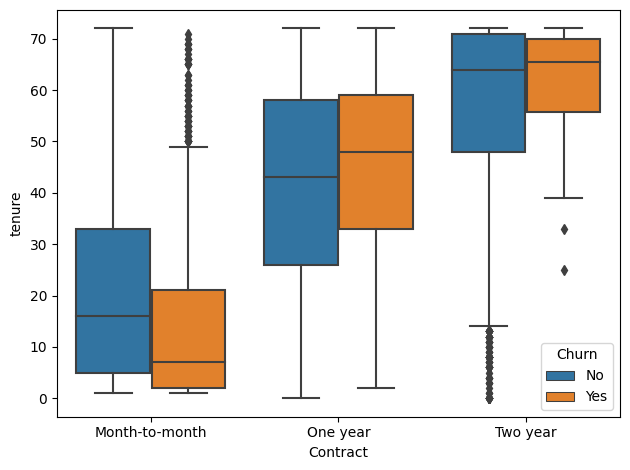

In [ ]:
# Box plot
sns.boxplot(x='Contract', y='tenure', hue='Churn',data=telecom_df)
axes[0].set_title('Box Plot - Comparison of tenure across Contract')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('tenure')


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Two Year Contract')

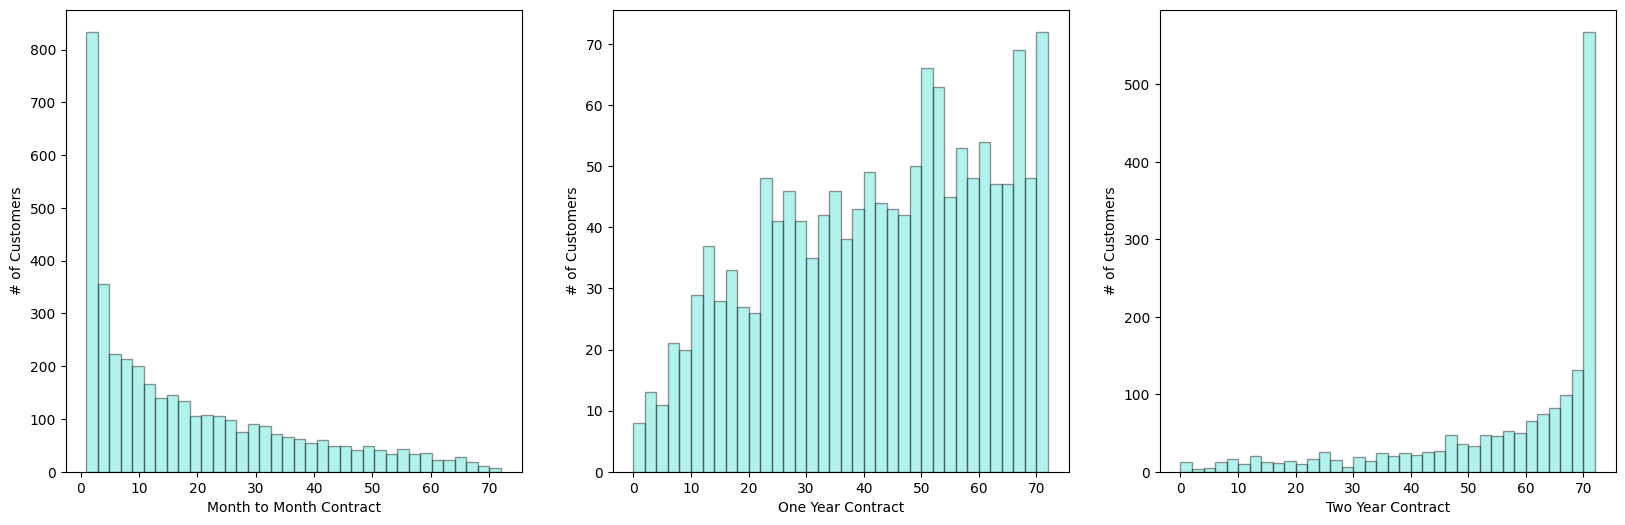

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax=sns.distplot(telecom_df[telecom_df['Contract']=='Month-to-month']['tenure'],hist=True,kde=False,bins=int(180/5), color = 'turquoise',hist_kws={'edgecolor':'black'},ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Month to Month Contract')

ax=sns.distplot(telecom_df[telecom_df['Contract']=='One year']['tenure'],hist=True,kde=False,bins=int(180/5), color = 'turquoise',hist_kws={'edgecolor':'black'},ax=ax2)
ax.set_ylabel('# of Customers')
ax.set_xlabel('One Year Contract')

ax=sns.distplot(telecom_df[telecom_df['Contract']=='Two year']['tenure'],hist=True,kde=False,bins=int(180/5), color = 'turquoise',hist_kws={'edgecolor':'black'},ax=ax3)

ax.set_ylabel('# of Customers')
ax.set_xlabel('Two Year Contract')



Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months.

**Distribution of various services used by customers.**

In [ ]:
telecom_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

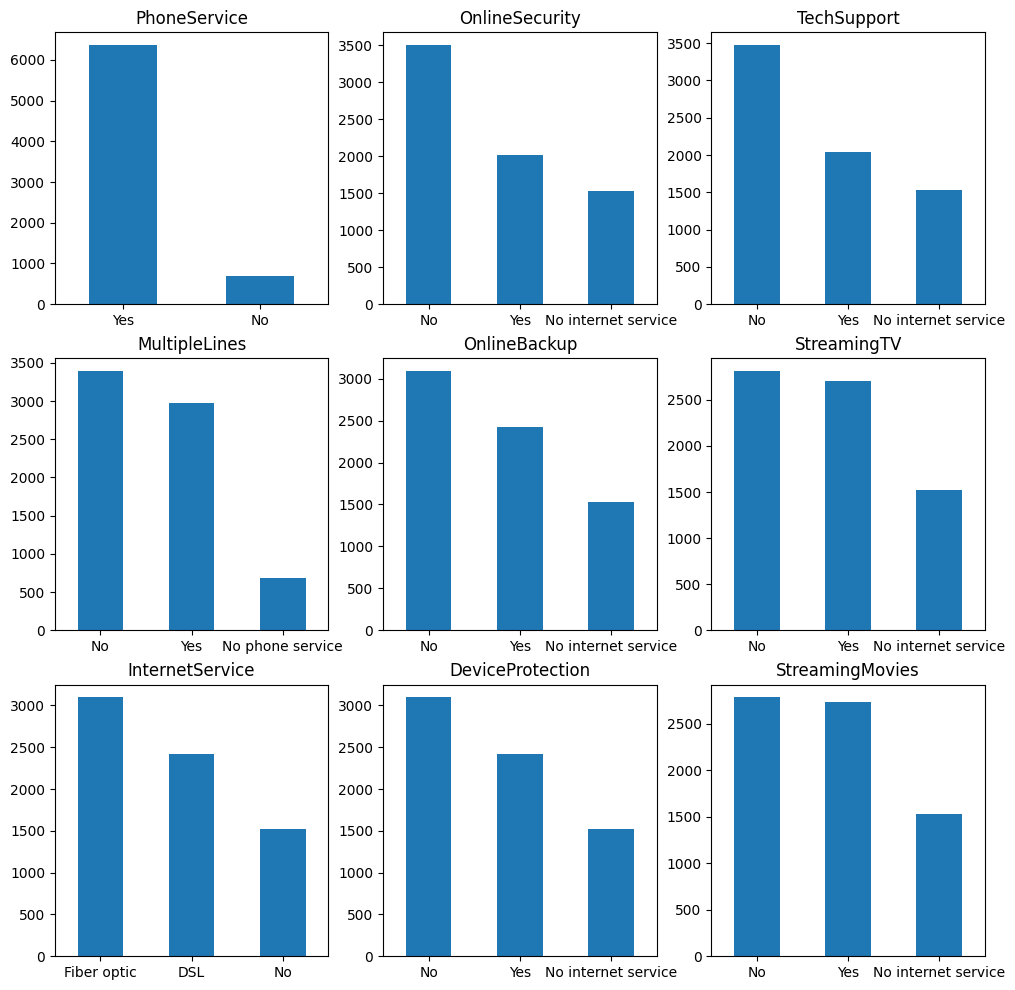

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (12,12))

for i ,item in enumerate(services):

 if i < 3:
   ax=telecom_df[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)

 elif i >=3 and i <6:
   ax=telecom_df[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)

 elif  i <9:
   ax=telecom_df[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)
 ax.set_title(item)

***Let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot***

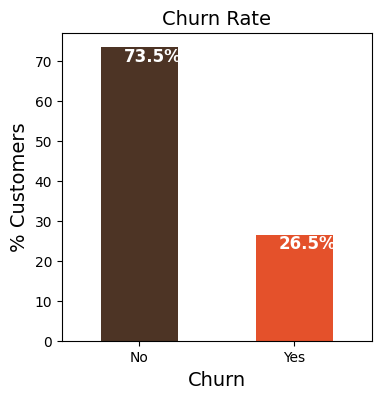

In [9]:
colors = ['#4D3425','#E4512B']
ax = (telecom_df['Churn'].value_counts()*100.0 /len(telecom_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (4,4))
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

*Churn rate on Senior Citizen*

Text(0.5, 1.0, '% of Senior Citizens')

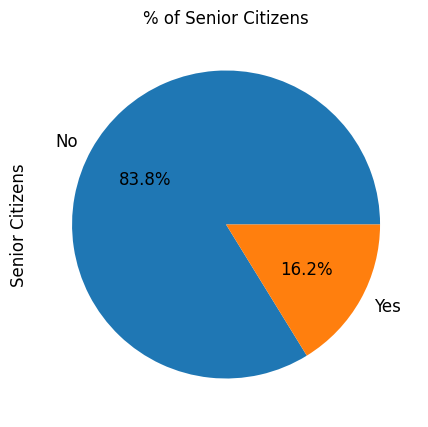

In [15]:
ax = (telecom_df['SeniorCitizen'].value_counts()*100.0 /len(telecom_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

% **Senior Citizens **- There are only **16%** of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (telecom_df['Churn'].value_counts()*100.0 /len(telecom_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (4,4))
# Box plot
sns.boxplot(x='Contract', y='tenure', hue='Churn',data=telecom_df)
axes[0].set_title('Box Plot - Comparison of tenure across Contract')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('tenure')


plt.tight_layout()
plt.show()

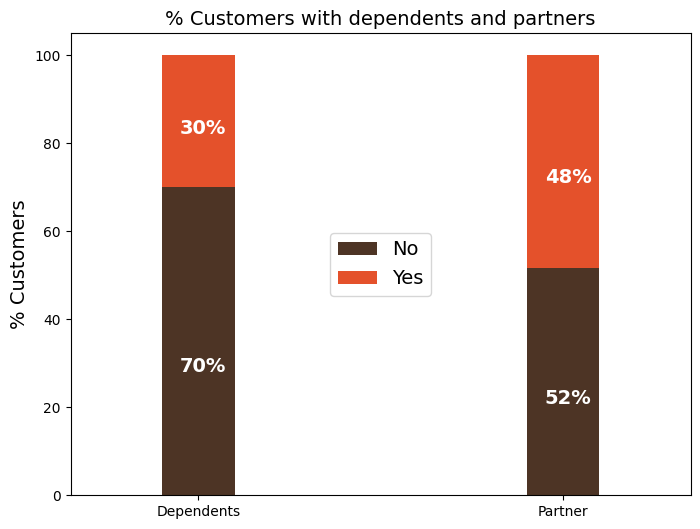

In [31]:
df2 = pd.melt(telecom_df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3=df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Partner and dependent status** - About** 50%** of the customers have a partner, while only **30% **of the total customers have dependents.

**We will develop some predictive models and compare them.**

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

**1. Logistic Regression**

In [19]:
# We will use the data frame where we had created dummy variables
y=df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [20]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8045433033601515


**2. Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7543776620918126


<Axes: >

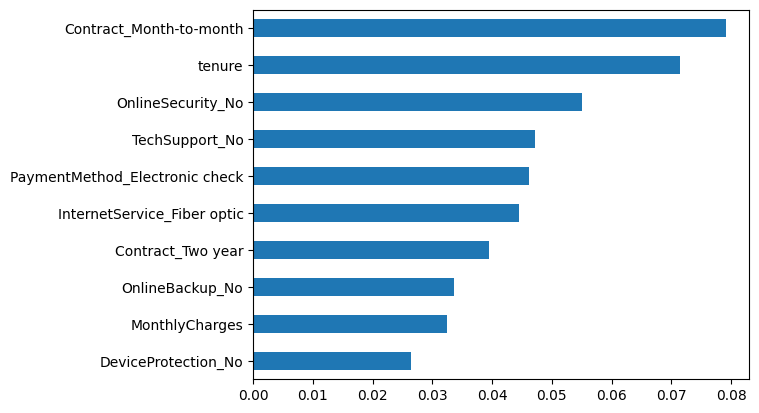

In [22]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**
Monthly contract, tenure and total charges are the most important predictor variables to predict churn.

**3. Support Vecor Machine (SVM)**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7984386089425124

In [24]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[908 115]
 [169 217]]


**4. ADA Boost**

In [25]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.801277501774308

**5. XG Boost**

In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.772888573456352

** XG Boost was able to increase the accuracy on test data to almost 83%. Clearly, XG Boost is a winner among all other techniques. XG Boost is a slow learning model and is based on the concept of Boosting**